In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_anime = pd.read_csv(r"Desktop\PGP-DSE Data\Machine Learning\Recommender Systems Datasets\Anime Recommendation\anime.csv")
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
df_rating = pd.read_csv(r"Desktop\PGP-DSE Data\Machine Learning\Recommender Systems Datasets\Anime Recommendation\rating.csv")
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [4]:
df_rating.replace({-1:np.nan},inplace=True)

# ==============================================================

# Implementing Content Based Filtering

# ==============================================================

In [52]:
df_anime['type'].value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

In [121]:
df1 = df_anime[df_anime['type']=='TV']
df2 = df_anime[df_anime['type']=='OVA']
df3 = df_anime[df_anime['type']=='Movie']
df4 = df_anime[df_anime['type']=='Special']
df5 = df_anime[df_anime['type']=='ONA']
df6 = df_anime[df_anime['type']=='Music']

In [122]:
df6.head()

,anime_id,name,genre,type,episodes,rating,members
169,34240,Shelter,"Music, Sci-Fi",Music,1,8.38,71136
336,731,Interstella5555: The 5tory of The 5ecret 5tar ...,"Adventure, Drama, Music, Sci-Fi",Music,1,8.17,31464
533,17949,The Everlasting Guilty Crown,Music,Music,1,8.00,11663
1178,2768,CLAMP in Wonderland 2,"Action, Comedy, Drama, Fantasy, Magic, Music, ...",Music,1,7.64,13985
1267,9930,Snow Halation,Music,Music,1,7.61,8731


In [123]:
df1 = df1.reset_index()
df1.drop(columns=['index'],axis=1,inplace=True)

df2 = df2.reset_index()
df2.drop(columns=['index'],axis=1,inplace=True)

df3 = df3.reset_index()
df3.drop(columns=['index'],axis=1,inplace=True)

df4 = df4.reset_index()
df4.drop(columns=['index'],axis=1,inplace=True)

df5 = df5.reset_index()
df5.drop(columns=['index'],axis=1,inplace=True)

df6 = df6.reset_index()
df6.drop(columns=['index'],axis=1,inplace=True)

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Recommendations for TV Series

In [125]:
df1.head()

,anime_id,name,genre,type,episodes,rating,members
0,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
2,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
3,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
4,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351


In [126]:
# Filling NaNs with empty string
df1['genre'] = df1['genre'].fillna('')
genres_str = df1['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)
tfv_matrix.shape

(3787, 988)

In [127]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [128]:
indices = pd.Series(df1.index, index=df1['name']).drop_duplicates()

In [129]:
# Creating our Recommendation Function
def give_rec_tv(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]
    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))
    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:6]
    # Movie indices
    anime_indices = [i[0] for i in sig_scores]
    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': df1['name'].iloc[anime_indices].values,'Rating': df1['rating'].iloc[anime_indices].values})

In [130]:
give_rec_tv('Gintama°')

,Anime name,Rating
0,Gintama&#039;,9.16
1,Gintama&#039;: Enchousen,9.11
2,Gintama,9.04
3,Gintama (2017),NaN
4,Tono to Issho: Gantai no Yabou,6.73


# Recommendations for OVA

In [131]:
df2.head()

,anime_id,name,genre,type,episodes,rating,members
0,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
1,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Historical, Martial Arts, Roman...",OVA,4,8.83,129307
2,32366,Gintama°: Aizome Kaori-hen,"Comedy, Parody",OVA,2,8.69,16947
3,30709,Kamisama Hajimemashita: Kako-hen,"Comedy, Demons, Fantasy, Shoujo, Supernatural",OVA,4,8.64,33422
4,777,Hellsing Ultimate,"Action, Horror, Military, Seinen, Supernatural...",OVA,10,8.59,297454


In [132]:
# Filling NaNs with empty string
df2['genre'] = df2['genre'].fillna('')
genres_str = df2['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)
tfv_matrix.shape

(3311, 730)

In [133]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [134]:
indices = pd.Series(df2.index, index=df2['name']).drop_duplicates()

In [135]:
# Creating our Recommendation Function
def give_rec_OVA(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]
    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))
    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:6]
    # Movie indices
    anime_indices = [i[0] for i in sig_scores]
    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': df2['name'].iloc[anime_indices].values,'Rating': df2['rating'].iloc[anime_indices].values})

In [136]:
give_rec_OVA('Ginga Eiyuu Densetsu')

,Anime name,Rating
0,Ginga Eiyuu Densetsu Gaiden: Rasen Meikyuu,8.10
1,Uchuu Senkan Yamato 2199,8.53
2,Uchuu Senkan Yamato 2202: Ai no Senshi-tachi,NaN
3,Musekinin Kanchou Tylor OVA,7.33
4,Gunslinger Girl: Il Teatrino OVA,7.13


# Recommendations for Movies

In [137]:
df3.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
2,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1,9.05,102733
3,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
4,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193


In [138]:
# Filling NaNs with empty string
df3['genre'] = df3['genre'].fillna('')
genres_str = df3['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)
tfv_matrix.shape

(2348, 541)

In [139]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [140]:
indices = pd.Series(df3.index, index=df3['name']).drop_duplicates()

In [141]:
# Creating our Recommendation Function
def give_rec_movies(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]
    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))
    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:6]
    # Movie indices
    anime_indices = [i[0] for i in sig_scores]
    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': df3['name'].iloc[anime_indices].values,'Rating': df3['rating'].iloc[anime_indices].values})

In [142]:
give_rec_movies('Kimi no Na wa.')

,Anime name,Rating
0,Aura: Maryuuin Kouga Saigo no Tatakai,7.67
1,Kokoro ga Sakebitagatterunda.,8.32
2,Suki ni Naru Sono Shunkan wo.: Kokuhaku Jikkou...,NaN
3,Ace wo Nerae! (1979),6.95
4,Harmonie,7.52


# Recommendations for Special

In [143]:
df4.head()

,anime_id,name,genre,type,episodes,rating,members
0,21329,Mushishi Special: Hihamukage,"Adventure, Fantasy, Historical, Mystery, Seine...",Special,1,8.66,49036
1,24687,Mushishi Zoku Shou: Odoro no Michi,"Adventure, Fantasy, Historical, Mystery, Seine...",Special,1,8.54,34011
2,10863,Steins;Gate: Oukoubakko no Poriomania,"Sci-Fi, Thriller",Special,1,8.46,159548
3,264,Hajime no Ippo: Champion Road,"Comedy, Shounen, Sports",Special,1,8.39,47840
4,6945,Gintama: Shiroyasha Koutan,"Action, Comedy, Historical, Parody, Sci-Fi",Special,1,8.37,27213


In [144]:
# Filling NaNs with empty string
df4['genre'] = df4['genre'].fillna('')
genres_str = df4['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)
tfv_matrix.shape

(1676, 480)

In [145]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [146]:
indices = pd.Series(df4.index, index=df4['name']).drop_duplicates()

In [147]:
# Creating our Recommendation Function
def give_rec_special(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]
    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))
    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:6]
    # Movie indices
    anime_indices = [i[0] for i in sig_scores]
    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': df4['name'].iloc[anime_indices].values,'Rating': df4['rating'].iloc[anime_indices].values})

In [148]:
give_rec_special('Mushishi Special: Hihamukage')

,Anime name,Rating
0,Mushishi Zoku Shou: Odoro no Michi,8.54
1,Silk Road Shounen Yuuto: Toki wo Kakeru Shoune...,5.75
2,Mokke Specials,7.09
3,Kyoukai no Kanata: Mini Theater,6.82
4,Baccano! Specials,8.29


# Recommendations for ONA

In [149]:
df5.head()

,anime_id,name,genre,type,episodes,rating,members
0,3167,Eve no Jikan,"Sci-Fi, Slice of Life",ONA,6,8.26,99074
1,6505,There She Is!!,"Comedy, Romance",ONA,5,8.11,13935
2,32613,Elsword: El Lady,"Action, Fantasy",ONA,12,8.11,3846
3,31973,Mobile Suit Gundam Thunderbolt,"Action, Drama, Mecha, Military, Sci-Fi, Space",ONA,4,8.00,14419
4,15195,Hetalia: The Beautiful World,"Comedy, Historical, Parody",ONA,20,7.98,34960


In [150]:
# Filling NaNs with empty string
df5['genre'] = df5['genre'].fillna('')
genres_str = df5['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)
tfv_matrix.shape

(659, 158)

In [151]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [152]:
indices = pd.Series(df5.index, index=df5['name']).drop_duplicates()

In [153]:
# Creating our Recommendation Function
def give_rec_ona(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]
    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))
    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:6]
    # Movie indices
    anime_indices = [i[0] for i in sig_scores]
    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': df5['name'].iloc[anime_indices].values,'Rating': df5['rating'].iloc[anime_indices].values})

In [154]:
give_rec_ona('Eve no Jikan')

,Anime name,Rating
0,Mou Hitotsu no Mirai wo.,6.19
1,Honey Tokyo,5.88
2,Ima no Watashi ni Dekiru Koto...,5.40
3,Nanocore,6.17
4,Shitamachi Alien PapiPipiPupi,7.00


# Recommendations for Music

In [155]:
df6.head()

,anime_id,name,genre,type,episodes,rating,members
0,34240,Shelter,"Music, Sci-Fi",Music,1,8.38,71136
1,731,Interstella5555: The 5tory of The 5ecret 5tar ...,"Adventure, Drama, Music, Sci-Fi",Music,1,8.17,31464
2,17949,The Everlasting Guilty Crown,Music,Music,1,8.00,11663
3,2768,CLAMP in Wonderland 2,"Action, Comedy, Drama, Fantasy, Magic, Music, ...",Music,1,7.64,13985
4,9930,Snow Halation,Music,Music,1,7.61,8731


In [156]:
# Filling NaNs with empty string
df6['genre'] = df6['genre'].fillna('')
genres_str = df6['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)
tfv_matrix.shape

(488, 73)

In [157]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [158]:
indices = pd.Series(df6.index, index=df6['name']).drop_duplicates()

In [159]:
# Creating our Recommendation Function
def give_rec_music(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]
    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))
    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:6]
    # Movie indices
    anime_indices = [i[0] for i in sig_scores]
    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': df6['name'].iloc[anime_indices].values,'Rating': df6['rating'].iloc[anime_indices].values})

In [160]:
give_rec_music('Shelter')

,Anime name,Rating
0,Soratobu Toshi Keikaku,6.18
1,Space Station No.9,5.99
2,Portable Kuukou,5.85
3,Sign,4.91
4,Shinsei Kamattechan,4.85


# ==============================================================

# Implementing Collaborative Filtering With KNN

# ==============================================================

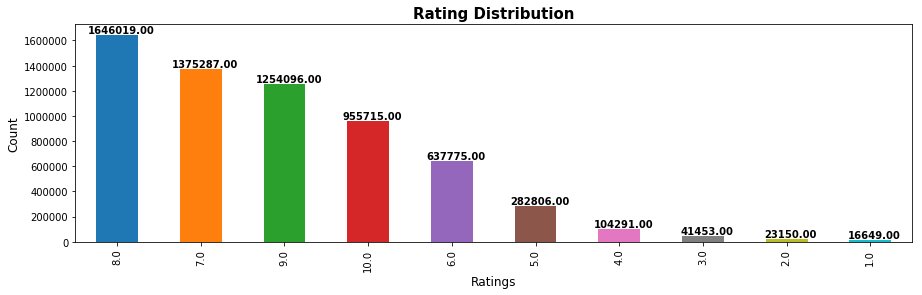

In [167]:
plt.figure(figsize=(15,4))
graph = df_rating['rating'].value_counts(sort=True).plot(kind='bar')
plt.title("Rating Distribution",fontsize=15,fontweight='bold')
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Count',fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black',fontsize=10,fontweight='bold')

To ensure statistical significance, users with less than 200 rating and movies with less than 100 ratings are being excluded from the dataset

In [170]:
count1 = df_rating['user_id'].value_counts()
df_rating = df_rating[df_rating['user_id'].isin(count1[count1>=200].index)]
count2 = df_rating['rating'].value_counts()
df_rating = df_rating[df_rating['rating'].isin(count2[count2>=100].index)]

In [175]:
combine_rating = pd.merge(df_rating,df_anime,on='anime_id')
combine_rating.drop(columns=['genre','type','episodes','rating_y','members'],axis=1,inplace=True)
combine_rating.head()

,user_id,anime_id,rating_x,name
0,5,6,8.0,Trigun
1,17,6,7.0,Trigun
2,129,6,9.0,Trigun
3,160,6,7.0,Trigun
4,226,6,8.0,Trigun


In [178]:
combine_rating = combine_rating.dropna(axis=0,subset=['name'])
anime_rating_count = (combine_rating.groupby(by=['name'])['rating_x'].count().reset_index().rename(columns={'rating_x':'totalratingcount'})[['name','totalratingcount']])
anime_rating_count.head()

,name,totalratingcount
0,&quot;0&quot;,14
1,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,515
2,&quot;Bungaku Shoujo&quot; Memoire,540
3,&quot;Bungaku Shoujo&quot; Movie,978
4,&quot;Eiji&quot;,12


We will combine the rating data with the anime_rating_count data, this gives us exactly what we need to find out which movies are popular and filter out lesser known books. 

In [180]:
df_final = combine_rating.merge(anime_rating_count,left_on='name',right_on='name',how='left')
df_final.head()

,user_id,anime_id,rating_x,name,totalratingcount
0,5,6,8.0,Trigun,3497
1,17,6,7.0,Trigun,3497
2,129,6,9.0,Trigun,3497
3,160,6,7.0,Trigun,3497
4,226,6,8.0,Trigun,3497


In [184]:
thresh = 50
df_final = df_final.query('totalratingcount >= 50')
df_final.head()

,user_id,anime_id,rating_x,name,totalratingcount
0,5,6,8.0,Trigun,3497
1,17,6,7.0,Trigun,3497
2,129,6,9.0,Trigun,3497
3,160,6,7.0,Trigun,3497
4,226,6,8.0,Trigun,3497


In [186]:
df_final.shape

(3291733, 5)

In [194]:
from scipy.sparse import csr_matrix
df_final = df_final.drop_duplicates(['user_id','name'])
df_final_pivot = df_final.pivot(index='name',columns='user_id',values='rating_x').fillna(0)
df_final_matrix = csr_matrix(df_final_pivot.values)

In [196]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(df_final_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [199]:
query_index = np.random.choice(df_final_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(df_final_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

2733


In [200]:
df_final_pivot.iloc[query_index,:].values.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [201]:
df_final_pivot.index[query_index]

'Mirai Shounen Conan'

In [204]:
l1,l2 = [],[]
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(df_final_pivot.index[query_index]))
    else:
        l1.append(df_final_pivot.index[indices.flatten()[i]])
        l2.append(distances.flatten()[i])
        #print('{0}: {1}, --> {2}:'.format(i, df_final_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
l3 = pd.DataFrame(list(zip(l1,l2)),columns=['Recommended Movie','Distance'])
l3

Recommendations for Mirai Shounen Conan:



,Recommended Movie,Distance
0,Romeo no Aoi Sora,0.575306
1,Takarajima,0.590284
2,Ie Naki Ko Remi,0.646967
3,Ginga Sengoku Gunyuuden Rai,0.666188
4,Honoo no Toukyuuji: Dodge Danpei,0.668499


# ==============================================================

# Implementing Collaborative Filtering with Pearson Correlation

# ==============================================================

In [4]:
df_rating.replace({-1:np.nan},inplace=True)

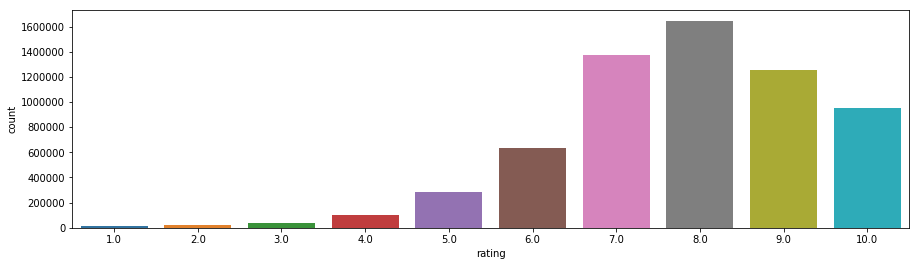

In [5]:
plt.figure(figsize=(15,4))
sns.countplot(x=df_rating.rating,data=df_rating)

In [6]:
# Here we are trying to make a recommendation system with the help of correlations
# We will be seeing how one book is related to another anime and on that basis animes will be recommended, i.e the books 
# with high correlation to a anime will be most likely to be recommended

In [7]:
df_rating.fillna(value=0,inplace=True)

In [8]:
rating_count = pd.DataFrame(df_rating.groupby('anime_id')['rating'].count())
rating_count.sort_values('rating',ascending=False,inplace=True)

rating_count.reset_index(inplace=True)
df_merged = pd.merge(rating_count,df_anime,on='anime_id')

df_merged.drop(columns=['genre','type','episodes','members'],axis=1,inplace=True)
df_merged.columns = ['Anime Id','#Ratings','Anime Name','Average Rating']
df_merged.head()

,Anime Id,#Ratings,Anime Name,Average Rating
0,1535.0,39340,Death Note,8.71
1,11757.0,30583,Sword Art Online,7.83
2,16498.0,29584,Shingeki no Kyojin,8.54
3,1575.0,27718,Code Geass: Hangyaku no Lelouch,8.83
4,226.0,27506,Elfen Lied,7.85


In [9]:
# These above are the recommendations on the basis of number of times ratings provided.

In [10]:
# Now we will try to make recommendation by using the Pearson's R Co-efficient to measure the linear correlation between 2
# variables, in our case, ratings for 2 animes.
# First we need to find out the average rating and the number or ratings each book received.

In [11]:
average_rating = pd.DataFrame(df_rating.groupby('anime_id')['rating'].mean())
average_rating['Rating_Count'] = pd.DataFrame(df_rating.groupby('anime_id')['rating'].count())
average_rating.sort_values('Rating_Count',ascending=False).head()

,rating,Rating_Count
anime_id,,
1535.0,7.686172,39340
11757.0,7.002877,30583
16498.0,7.459235,29584
1575.0,7.770835,27718
226.0,6.898131,27506


In [12]:
# Here we are taking Rating_Count as well as the average rating a particular anime received because in the earlier 
# recommendation we only recommended on the basis of number of ratings an anime received, which is giving us biased results
# because we are not taking into account the fact that the movie with most number of ratings might not be a good one and, in
# our case as we saw above that was not the case but still this recommendation system in actual world scenario will give us
# biased results, hence we will be taking that biasness out of the equation by taking average rating into account.

### Now to ensure Statistical significance, users with less than 200 ratings and books with less than 100 ratings are excluded.

In [13]:
counts1 = df_rating['user_id'].value_counts()
df_rating = df_rating[df_rating['user_id'].isin(counts1[counts1>=200].index)]
counts = df_rating['rating'].value_counts()
df_rating = df_rating[df_rating['rating'].isin(counts[counts>=200].index)]

In [14]:
ratings_pivot = df_rating.pivot(index='user_id',columns='anime_id').rating
userID = ratings_pivot.index
animeID = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(11278, 11192)


anime_id,1.0,5.0,6.0,7.0,8.0,15.0,16.0,17.0,18.0,19.0,...,34283.0,34324.0,34325.0,34349.0,34358.0,34367.0,34412.0,34475.0,34476.0,34519.0
user_id,,,,,,,,,,,,,,,,,,,,,
5.0,NaN,NaN,8.0,NaN,NaN,6.0,NaN,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43.0,10.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
bones_rating = ratings_pivot[11757]
similar_to_bones = ratings_pivot.corrwith(bones_rating)
corr_bones = pd.DataFrame(similar_to_bones,columns=['PearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['Rating_Count'])
x = corr_summary[corr_summary['Rating_Count']>=400].sort_values('PearsonR',ascending=False).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [31]:
# We have received the Anime ID's, but now we need the book names in order to make final recommendations

In [32]:
x.reset_index(inplace=True)
x = pd.merge(x,df_anime,on='anime_id')
x.drop(columns=['genre','type','episodes','members','rating','anime_id'],axis=1,inplace=True)
x.head()

,PearsonR,Rating_Count,name
0,1.000000,30583,Sword Art Online
1,0.793042,405,Senjou no Valkyria 3: Tagatame no Juusou
2,0.775169,873,Hayate no Gotoku! Cuties
3,0.762088,13814,Sword Art Online II
4,0.756864,1484,Vividred Operation


In [36]:
# This concludes our project for making recommendations for Anime